# Dataset Create/Read/Export/Plot

In [1]:
# Import all libraries needed for the tutorial
# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv
# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.25.1
Matplotlib version 3.1.1


In [28]:
# create data 
# The data set will consist of 5 baby names and the number of births recorded for that year
# The inital set of baby names and birth rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
# combining two lists together
BabyDataSet = list(zip(names,births))
# printing dataset created after merge
BabyDataSet
# storing dataset into a Pandas Dataframe which has a tabular format
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
# printing Dataframe
df
# df info
df.info()
# print head, tail
df.head(2)
df.tail(2)
# unique values
df['Names'].unique()
# describing the column
print(df['Names'].describe())
# grouping based on column name
name = df.groupby('Names')
df = name.sum()
df
# writing dataframe to a csv file
df.to_csv('births1880.csv',index=False,header=False)


[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
Names     5 non-null object
Births    5 non-null int64
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


,Names,Births
0,Bob,968
1,Jessica,155


,Names,Births
3,John,578
4,Mel,973


array(['Bob', 'Jessica', 'Mary', 'John', 'Mel'], dtype=object)

count       5
unique      5
top       Bob
freq        1
Name: Names, dtype: object


,Births
Names,
Bob,968
Jessica,155
John,578
Mary,77
Mel,973


In [17]:
# read data from csv file
Location = r'/Users/kiruthikasekar/Workspace/workshop/births1880.csv'
# reading file into a dataframe
df = pd.read_csv(Location,header=None,names=['Names','Births'])
# print df
df
# deleting the file
import os
os.remove(Location)

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [19]:
# prepare data
df.dtypes
# Check data type of Births column
df.Births.dtype
df.Names.dtype


Names     object
Births     int64
dtype: object

dtype('int64')

dtype('O')

In [20]:
# analyze data
# finding baby name with highest birth rate
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)
# or
# Method 2:
df['Births'].max()

,Names,Births
4,Mel,973


973

The most popular name


,Births
Names,
Mel,973
Bob,968
John,578
Jessica,155
Mary,77


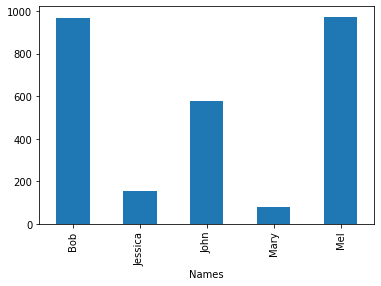

In [27]:
# Create graph
df['Births'].plot.bar()

print("The most popular name")
df.sort_values(by='Births', ascending=False)

In [33]:
# read/write excel
df.to_excel('sample.xlsx', index=False)
Location = r'/Users/kiruthikasekar/Workspace/workshop/sample.xlsx'
# Parse a specific sheet
df = pd.read_excel(Location)
df

,Births
0,968
1,155
2,578
3,77
4,973


# Read/Write Text File - Descriptive Stats - Grouping - Sorting 

In [56]:
df=read_csv('/Users/kiruthikasekar/Workspace/workshop/datasets/Iris.csv')
#df
#df
# Unique values
df['Species'].unique()
# size of unique values
df['Species'].unique().size
# filter values based on condition
petalfilter = df['PetalLengthCm'] == 1.4
df[petalfilter]
# filter values based on multiple conditions
df[(df['PetalLengthCm'] == 1.4) & (df['SepalLengthCm'] == 5.1)]



array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

3

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
12,13,4.8,3.0,1.4,0.1,Iris-setosa
17,18,5.1,3.5,1.4,0.3,Iris-setosa
28,29,5.2,3.4,1.4,0.2,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
45,46,4.8,3.0,1.4,0.3,Iris-setosa


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
17,18,5.1,3.5,1.4,0.3,Iris-setosa


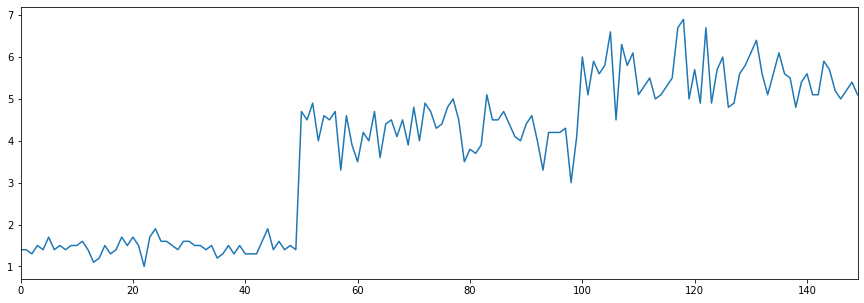

In [58]:
df['PetalLengthCm'].plot(figsize=(15,5))


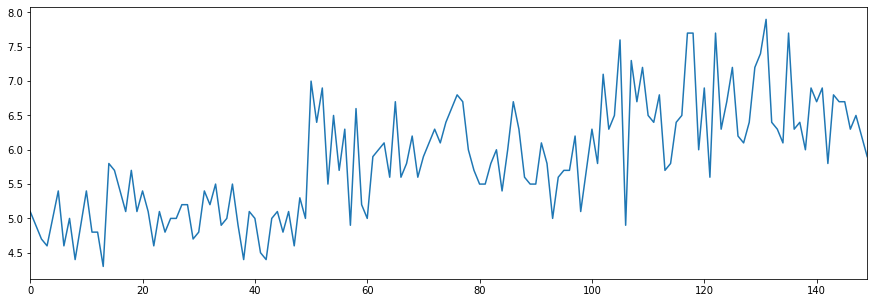

In [59]:
df['SepalLengthCm'].plot(figsize=(15,5))

In [83]:
# dataframe shape
df.shape
# reset index
df.reset_index()
# grouping dataframe
df.groupby(['Species']).count()
df.groupby(['Species']).sum()
df.groupby(['Species']).max()
df.groupby(['Species']).min()

# What is the index of the dataframe
min=df.groupby(['Species']).min()
min
del min['Id']
min
# What is the index of the dataframe
min.index

(150, 6)

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...,...
145,145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,148,149,6.2,3.4,5.4,2.3,Iris-virginica


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1275,250.3,170.9,73.2,12.2
Iris-versicolor,3775,296.8,138.5,213.0,66.3
Iris-virginica,6275,329.4,148.7,277.6,101.3


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,5.8,4.4,1.9,0.6
Iris-versicolor,100,7.0,3.4,5.1,1.8
Iris-virginica,150,7.9,3.8,6.9,2.5


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,4.3,2.3,1.0,0.1
Iris-versicolor,51,4.9,2.0,3.0,1.0
Iris-virginica,101,4.9,2.2,4.5,1.4


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,4.3,2.3,1.0,0.1
Iris-versicolor,51,4.9,2.0,3.0,1.0
Iris-virginica,101,4.9,2.2,4.5,1.4


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,4.3,2.3,1.0,0.1
Iris-versicolor,4.9,2.0,3.0,1.0
Iris-virginica,4.9,2.2,4.5,1.4


Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object', name='Species')

In [98]:
maxdf=df.groupby(['Species','PetalLengthCm']).max()
del maxdf['Id']
maxdf.index
maxdf.columns

MultiIndex([(    'Iris-setosa', 1.0),
            (    'Iris-setosa', 1.1),
            (    'Iris-setosa', 1.2),
            (    'Iris-setosa', 1.3),
            (    'Iris-setosa', 1.4),
            (    'Iris-setosa', 1.5),
            (    'Iris-setosa', 1.6),
            (    'Iris-setosa', 1.7),
            (    'Iris-setosa', 1.9),
            ('Iris-versicolor', 3.0),
            ('Iris-versicolor', 3.3),
            ('Iris-versicolor', 3.5),
            ('Iris-versicolor', 3.6),
            ('Iris-versicolor', 3.7),
            ('Iris-versicolor', 3.8),
            ('Iris-versicolor', 3.9),
            ('Iris-versicolor', 4.0),
            ('Iris-versicolor', 4.1),
            ('Iris-versicolor', 4.2),
            ('Iris-versicolor', 4.3),
            ('Iris-versicolor', 4.4),
            ('Iris-versicolor', 4.5),
            ('Iris-versicolor', 4.6),
            ('Iris-versicolor', 4.7),
            ('Iris-versicolor', 4.8),
            ('Iris-versicolor', 4.9),
            

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm'], dtype='object')

In [97]:
maxdf.index.levels[0]

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object', name='Species')

In [93]:
maxdf.index.levels[1]

Float64Index([1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 3.0, 3.3, 3.5, 3.6,
              3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
              5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.3,
              6.4, 6.6, 6.7, 6.9],
             dtype='float64', name='PetalLengthCm')

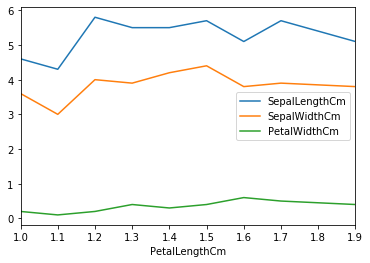

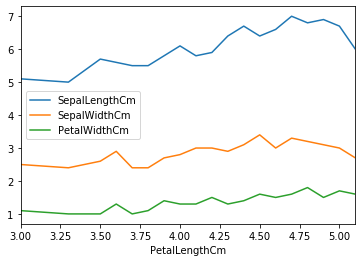

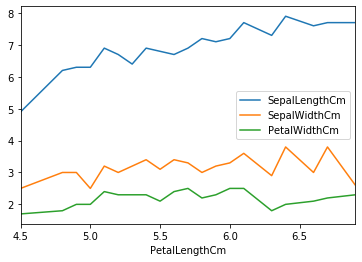

In [95]:
maxdf.loc['Iris-setosa'].plot()
maxdf.loc['Iris-versicolor'].plot()
maxdf.loc['Iris-virginica'].plot()

In [103]:
maxdf['SepalLengthCm'].sort_values()

Species          PetalLengthCm
Iris-setosa      1.1              4.3
                 1.0              4.6
Iris-virginica   4.5              4.9
Iris-versicolor  3.3              5.0
                 3.0              5.1
Iris-setosa      1.6              5.1
                 1.9              5.1
                 1.4              5.5
                 1.3              5.5
Iris-versicolor  3.7              5.5
                 3.8              5.5
                 3.6              5.6
Iris-setosa      1.7              5.7
Iris-versicolor  3.5              5.7
Iris-setosa      1.5              5.7
                 1.2              5.8
Iris-versicolor  3.9              5.8
                 4.1              5.8
                 4.2              5.9
                 5.1              6.0
                 4.0              6.1
Iris-virginica   4.8              6.2
                 5.0              6.3
                 4.9              6.3
                 5.3              6.4
Iris-versicolor  4.

# Adding/deleting columns - Index operations

In [105]:
# data set
d = [0,1,2,3,4,5,6,7,8,9]

# Create dataframe
df = pd.DataFrame(d)
df

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [106]:
# Lets change the name of the column
df.columns = ['Rev']
df

,Rev
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [107]:
# Lets add a column
df['NewCol'] = 5
df

,Rev,NewCol
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5
5,5,5
6,6,5
7,7,5
8,8,5
9,9,5


In [108]:
# Lets modify our new column
df['NewCol'] = df['NewCol'] + 1
df

,Rev,NewCol
0,0,6
1,1,6
2,2,6
3,3,6
4,4,6
5,5,6
6,6,6
7,7,6
8,8,6
9,9,6


In [109]:
# We can delete columns
del df['NewCol']
df

,Rev
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [110]:
# Lets add a couple of columns
df['test'] = 3
df['col'] = df['Rev']
df

,Rev,test,col
0,0,3,0
1,1,3,1
2,2,3,2
3,3,3,3
4,4,3,4
5,5,3,5
6,6,3,6
7,7,3,7
8,8,3,8
9,9,3,9


In [111]:
# If we wanted, we could change the name of the index
i = ['a','b','c','d','e','f','g','h','i','j']
df.index = i
df

,Rev,test,col
a,0,3,0
b,1,3,1
c,2,3,2
d,3,3,3
e,4,3,4
f,5,3,5
g,6,3,6
h,7,3,7
i,8,3,8
j,9,3,9


In [112]:
# select pieces of dataframe using loc
df.loc['a']

Rev     0
test    3
col     0
Name: a, dtype: int64

In [113]:
# df.loc[inclusive:inclusive]
df.loc['a':'d']

,Rev,test,col
a,0,3,0
b,1,3,1
c,2,3,2
d,3,3,3


In [114]:
# df.iloc[inclusive:exclusive]
# Note: .iloc is strictly integer position based
df.iloc[0:3]

,Rev,test,col
a,0,3,0
b,1,3,1
c,2,3,2


In [115]:
df['Rev']

a    0
b    1
c    2
d    3
e    4
f    5
g    6
h    7
i    8
j    9
Name: Rev, dtype: int64

In [116]:
df[['Rev', 'test']]

,Rev,test
a,0,3
b,1,3
c,2,3
d,3,3
e,4,3
f,5,3
g,6,3
h,7,3
i,8,3
j,9,3


In [117]:
df.loc[df.index[0:3],'Rev']

a    0
b    1
c    2
Name: Rev, dtype: int64

In [118]:
df.loc[df.index[5:],'col']

f    5
g    6
h    7
i    8
j    9
Name: col, dtype: int64

In [119]:
df.loc[df.index[:3],['col', 'test']]

,col,test
a,0,3
b,1,3
c,2,3


In [120]:
# Select top N number of records (default = 5)
df.head()

,Rev,test,col
a,0,3,0
b,1,3,1
c,2,3,2
d,3,3,3
e,4,3,4


In [121]:
# Select bottom N number of records (default = 5)
df.tail()

,Rev,test,col
f,5,3,5
g,6,3,6
h,7,3,7
i,8,3,8
j,9,3,9


# Stack/Unstack/Transpose functions

In [122]:
# data set
d = {'one':[1,1],'two':[2,2]}
i = ['a','b']

# Create dataframe
df = pd.DataFrame(data = d, index = i)
df

,one,two
a,1,2
b,1,2


In [123]:
df.index

Index(['a', 'b'], dtype='object')

In [124]:
# Bring the columns and place them in the index
stack = df.stack()
stack

a  one    1
   two    2
b  one    1
   two    2
dtype: int64

In [128]:
# The index now includes the column names
stack.index


MultiIndex([('a', 'one'),
            ('a', 'two'),
            ('b', 'one'),
            ('b', 'two')],
           )

In [126]:
unstack = df.unstack()
unstack

one  a    1
     b    1
two  a    2
     b    2
dtype: int64

In [127]:
unstack.index

MultiIndex([('one', 'a'),
            ('one', 'b'),
            ('two', 'a'),
            ('two', 'b')],
           )

In [130]:
# We can also flip the column names with the index using the T (transpose) function.
df
transpose = df.T
transpose

,one,two
a,1,2
b,1,2


,a,b
one,1,1
two,2,2


In [131]:
transpose.index

Index(['one', 'two'], dtype='object')

# Groupby Function

In [132]:
# data set
d = {'one':[1,1,1,1,1],
     'two':[2,2,2,2,2],
     'letter':['a','a','b','b','c']}

# Create dataframe
df = pd.DataFrame(d)
df

,one,two,letter
0,1,2,a
1,1,2,a
2,1,2,b
3,1,2,b
4,1,2,c


In [133]:
# Create group object
one = df.groupby('letter')

# Apply sum function
one.sum()

,one,two
letter,,
a,2,4
b,2,4
c,1,2


In [134]:
letterone = df.groupby(['letter','one']).sum()
letterone

,,two
letter,one,
a,1,4
b,1,4
c,1,2


In [135]:
letterone.index

MultiIndex([('a', 1),
            ('b', 1),
            ('c', 1)],
           names=['letter', 'one'])

In [137]:
# You may want to not have the columns you are grouping by become your index, this can be easily achieved as shown below.
df
letterone = df.groupby(['letter','one'], as_index=False).sum()
letterone

,one,two,letter
0,1,2,a
1,1,2,a
2,1,2,b
3,1,2,b
4,1,2,c


,letter,one,two
0,a,1,4
1,b,1,4
2,c,1,2


In [138]:
letterone.index

Int64Index([0, 1, 2], dtype='int64')

# Outlier Detection

In [139]:
# Create a dataframe with dates as your index
States = ['NY', 'NY', 'NY', 'NY', 'FL', 'FL', 'GA', 'GA', 'FL', 'FL'] 
data = [1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10]
idx = pd.date_range('1/1/2012', periods=10, freq='MS')
df1 = pd.DataFrame(data, index=idx, columns=['Revenue'])
df1['State'] = States

# Create a second dataframe
data2 = [10.0, 10.0, 9, 9, 8, 8, 7, 7, 6, 6]
idx2 = pd.date_range('1/1/2013', periods=10, freq='MS')
df2 = pd.DataFrame(data2, index=idx2, columns=['Revenue'])
df2['State'] = States

In [140]:
df1

,Revenue,State
2012-01-01,1.0,NY
2012-02-01,2.0,NY
2012-03-01,3.0,NY
2012-04-01,4.0,NY
2012-05-01,5.0,FL
2012-06-01,6.0,FL
2012-07-01,7.0,GA
2012-08-01,8.0,GA
2012-09-01,9.0,FL
2012-10-01,10.0,FL


In [141]:
df2

,Revenue,State
2013-01-01,10.0,NY
2013-02-01,10.0,NY
2013-03-01,9.0,NY
2013-04-01,9.0,NY
2013-05-01,8.0,FL
2013-06-01,8.0,FL
2013-07-01,7.0,GA
2013-08-01,7.0,GA
2013-09-01,6.0,FL
2013-10-01,6.0,FL


In [142]:
# Combine dataframes
df = pd.concat([df1,df2])
df

,Revenue,State
2012-01-01,1.0,NY
2012-02-01,2.0,NY
2012-03-01,3.0,NY
2012-04-01,4.0,NY
2012-05-01,5.0,FL
2012-06-01,6.0,FL
2012-07-01,7.0,GA
2012-08-01,8.0,GA
2012-09-01,9.0,FL
2012-10-01,10.0,FL


In [144]:
# Method 1
# Gaussian Distribution or normal distribution
# make a copy of original df
newdf = df.copy()

newdf['x-Mean'] = abs(newdf['Revenue'] - newdf['Revenue'].mean())
newdf['1.96*std'] = 1.96*newdf['Revenue'].std()  
newdf['Outlier'] = abs(newdf['Revenue'] - newdf['Revenue'].mean()) > 1.96*newdf['Revenue'].std()
newdf


,Revenue,State,x-Mean,1.96*std,Outlier
2012-01-01,1.0,NY,5.75,5.200273,True
2012-02-01,2.0,NY,4.75,5.200273,False
2012-03-01,3.0,NY,3.75,5.200273,False
2012-04-01,4.0,NY,2.75,5.200273,False
2012-05-01,5.0,FL,1.75,5.200273,False
2012-06-01,6.0,FL,0.75,5.200273,False
2012-07-01,7.0,GA,0.25,5.200273,False
2012-08-01,8.0,GA,1.25,5.200273,False
2012-09-01,9.0,FL,2.25,5.200273,False
2012-10-01,10.0,FL,3.25,5.200273,False


In [145]:
# Method 2
# Non Gaussian Distribution or non normal distribution
# make a copy of original df
newdf = df.copy()

State = newdf.groupby('State')

newdf['Lower'] = State['Revenue'].transform( lambda x: x.quantile(q=.25) - (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf['Upper'] = State['Revenue'].transform( lambda x: x.quantile(q=.75) + (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf['Outlier'] = (newdf['Revenue'] < newdf['Lower']) | (newdf['Revenue'] > newdf['Upper']) 
newdf


,Revenue,State,Lower,Upper,Outlier
2012-01-01,1.0,NY,-7.000,19.000,False
2012-02-01,2.0,NY,-7.000,19.000,False
2012-03-01,3.0,NY,-7.000,19.000,False
2012-04-01,4.0,NY,-7.000,19.000,False
2012-05-01,5.0,FL,2.625,11.625,False
2012-06-01,6.0,FL,2.625,11.625,False
2012-07-01,7.0,GA,6.625,7.625,False
2012-08-01,8.0,GA,6.625,7.625,True
2012-09-01,9.0,FL,2.625,11.625,False
2012-10-01,10.0,FL,2.625,11.625,False


# Multiple data formats

In [146]:
# Create DataFrame
d = [1,2,3,4,5,6,7,8,9]
df = pd.DataFrame(d, columns = ['Number'])
df

,Number
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9


In [148]:
# Export to Excel
df.to_excel('sample.xlsx', sheet_name = 'testing', index = False)


In [149]:
# Excel to DataFrame
# Your path will be different, please modify the path below.
location = r'/Users/kiruthikasekar/Workspace/workshop/sample.xlsx'

# Parse the excel file
df = pd.read_excel(location, 0)
df.head()

,Number
0,1
1,2
2,3
3,4
4,5


In [151]:
# DataFrame to JSON
df.to_json('sample.json')

In [153]:
jsonloc = r'/Users/kiruthikasekar/Workspace/workshop/sample.json'

# read json file
df2 = pd.read_json(jsonloc)
df2

,Number
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
